In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [24]:
train_df = pd.read_csv("./dataset/cleaned_train.csv")
test_df = pd.read_csv("./dataset/cleaned_test.csv")

## Distribution of the Dependent Variable

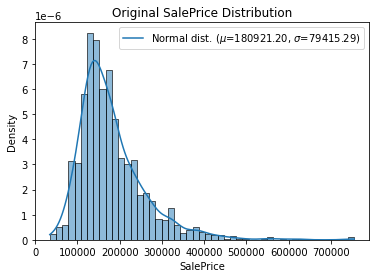

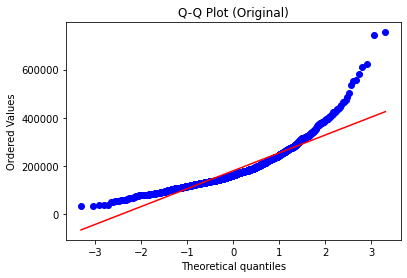

In [25]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot original SalePrice distribution with fitted normal curve
sns.histplot(train_df['SalePrice'], kde=True, stat="density")
mu, sigma = norm.fit(train_df['SalePrice'])
plt.legend(['Normal dist. ($\mu$={:.2f}, $\sigma$={:.2f})'.format(mu, sigma)])
plt.title('Original SalePrice Distribution')
plt.ylabel('Density')
plt.show()

# Q-Q plot for original SalePrice
stats.probplot(train_df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Original)')
plt.show()

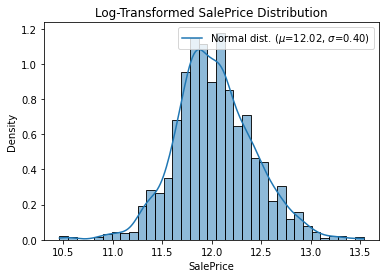

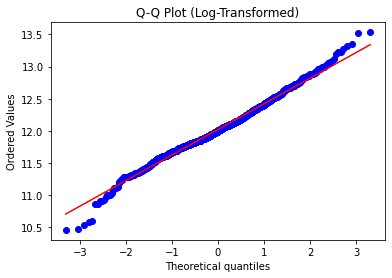

In [26]:
# Apply log(1+x) transformation
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

# Plot transformed SalePrice distribution with fitted normal curve
sns.histplot(train_df['SalePrice'], kde=True, stat="density")
mu, sigma = norm.fit(train_df['SalePrice'])
plt.legend(['Normal dist. ($\mu$={:.2f}, $\sigma$={:.2f})'.format(mu, sigma)])
plt.title('Log-Transformed SalePrice Distribution')
plt.ylabel('Density')
plt.show()

# Q-Q plot for log-transformed SalePrice
stats.probplot(train_df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Log-Transformed)')
plt.show()

In [27]:
y = train_df['SalePrice'] # np.log1p(df['SalePrice'])
X = train_df.drop(["SalePrice"], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

In [29]:
print(X_test.shape)
print(X_train.shape)

(292, 183)
(1168, 183)


RMSE: 0.154 (LR)
Execution Time: 0.78 seconds

RMSE: 0.1503 (Ridge)
Execution Time: 0.08 seconds

RMSE: 0.1978 (Lasso)
Execution Time: 0.13 seconds

RMSE: 0.1911 (ElasticNet)
Execution Time: 0.3 seconds

RMSE: 0.2222 (KNN)
Execution Time: 0.21 seconds

RMSE: 0.2003 (DT)
Execution Time: 0.26 seconds

RMSE: 0.1438 (RF)
Execution Time: 13.37 seconds

RMSE: 0.1301 (GBM)
Execution Time: 5.92 seconds

RMSE: 0.1463 (XGBoost)
Execution Time: 7.68 seconds

RMSE: 0.1337 (LightGBM)
Execution Time: 1.7 seconds



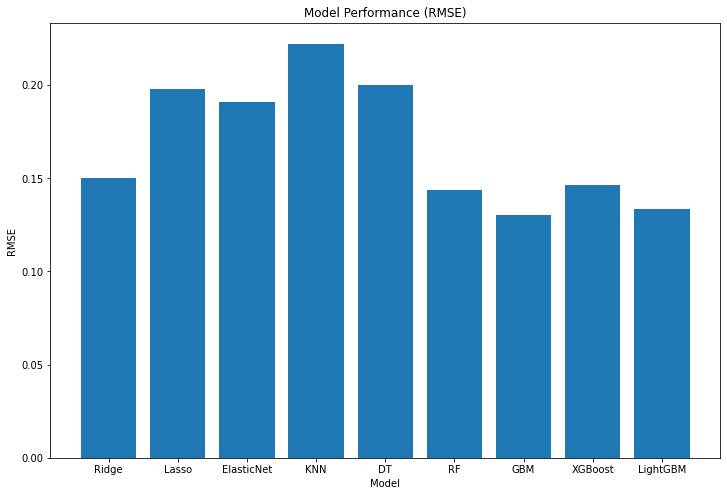

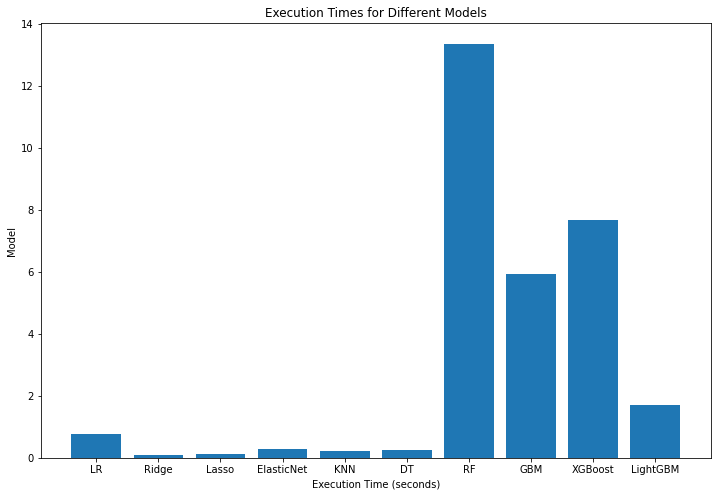

In [ ]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('DT', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(verbose=-1))]

rmse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot RMSE scores
plt.figure(figsize=(12, 8))
# Exclude LR from the plot
filtered_scores = [score for name, score in zip([name for name, _ in models], rmse_scores) if name != 'LR']
plt.bar([name for name, _ in models if name != 'LR'], filtered_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot execution times
plt.figure(figsize=(12, 8))
plt.bar([name for name, _ in models], execution_times)
plt.xlabel("Model")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Times for Different Models")
plt.show()

## Hyperparameter optimization

In [21]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import joblib

C:\Users\duong\AppData\Local\Temp\ipykernel_13824\3036530483.py:32: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ("RNN", KerasRegressor(build_fn=build_model_rnn, epochs=10, batch_size=32, verbose=0))


Training LR...
RMSE: 22678.0176, Time: 0.18 sec
---------------
Training Ridge...


d:\python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.7763e-13): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Best params: {'alpha': 0.1}
RMSE: 22999.7148, Time: 4.83 sec
---------------
Training Lasso...
Best params: {'alpha': 0.01}
RMSE: 26521.0078, Time: 3.22 sec
---------------
Training ElasticNet...
Best params: {'alpha': 0.01, 'l1_ratio': 0.1}
ElasticNet model saved to elasticnet_model.pkl
RMSE: 22799.1074, Time: 2.26 sec
---------------
Training KNN...
Best params: {'n_neighbors': 3, 'weights': 'uniform'}
RMSE: 47452.9180, Time: 0.13 sec
---------------
Training DT...
Best params: {'max_depth': 5}
RMSE: 38392.3505, Time: 0.16 sec
---------------
Training RF...
Best params: {'max_depth': 5, 'n_estimators': 100}
RMSE: 32549.6357, Time: 2.36 sec
---------------
Training GBM...
Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
RMSE: 45755.2477, Time: 3.04 sec
---------------
Training XGBoost...
Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
XGBoost model saved to xgboost_model.json
RMSE: 46093.8008, Time: 2.49 sec
---------------
Training L

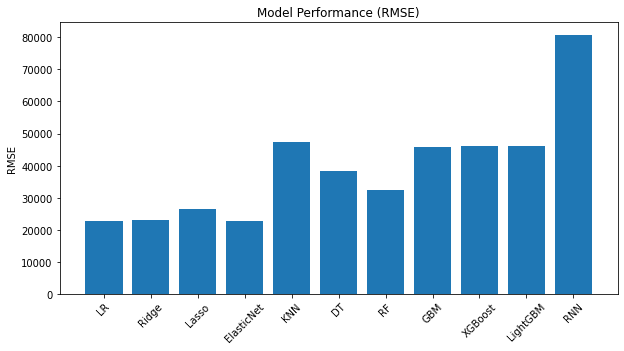

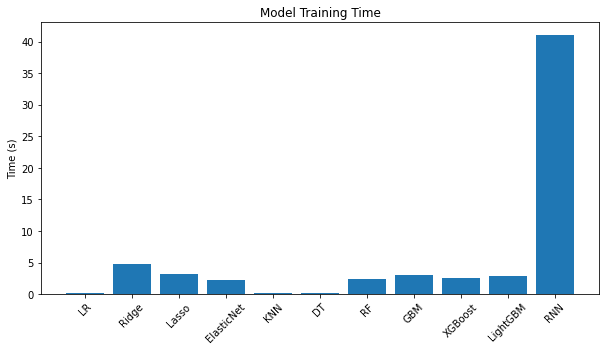

In [22]:
# --- Ensure float32 for TensorFlow
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# --- Build RNN
def build_model_rnn():
    model = Sequential([
        InputLayer(input_shape=(X_train.shape[1], 1)),
        LSTM(32, activation='tanh'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Model list
models = [
    ('LR', LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ('KNN', KNeighborsRegressor()),
    ('DT', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ("XGBoost", XGBRegressor(objective='reg:squarederror')),
    ("LightGBM", LGBMRegressor(verbose=-1)),
    ("RNN", KerasRegressor(build_fn=build_model_rnn, epochs=10, batch_size=32, verbose=0))
]

# --- Param grids for GridSearchCV (only for sklearn models)
param_grids = {
    "DT": {"max_depth": [5]},
    "RF": {"n_estimators": [100], "max_depth": [5]},
    "GBM": {"n_estimators": [100], "max_depth": [5], "learning_rate": [0.01]},
    "XGBoost": {"n_estimators": [100], "max_depth": [5], "learning_rate": [0.01]},
    "LightGBM": {"n_estimators": [100], "max_depth": [5], "learning_rate": [0.01]},
    "Lasso": {"alpha": [0.01]},
    "ElasticNet": {"alpha": [0.01], "l1_ratio": [0.1]},
    "KNN": {"n_neighbors": [3], "weights": ["uniform"]},
    "Ridge": {"alpha": [0.1]}
}

rmse_values = []
execution_times = []

# --- Model training loop
for name, model in models:
    print(f"Training {name}...")
    start_time = time.time()

    if name == "LR":
        model.fit(X_train, y_train)
        best_model = model
        y_pred = best_model.predict(X_test)

    elif name in param_grids:
        grid = GridSearchCV(model, param_grid=param_grids[name], cv=3, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        print(f"Best params: {grid.best_params_}")

        # Save ElasticNet model
        if name == "ElasticNet":
            joblib.dump(best_model, "elasticnet_model.pkl")
            print("ElasticNet model saved to elasticnet_model.pkl")

        # Save XGBoost model
        if name == "XGBoost":
            best_model.save_model("xgboost_model.json")
            print("XGBoost model saved to xgboost_model.json")

    elif name == "RNN":
        model.fit(X_train_rnn, y_train, verbose=0)
        y_pred = model.predict(X_test_rnn)

    end_time = time.time()
    exec_time = end_time - start_time
    execution_times.append(exec_time)

    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
    rmse_values.append(rmse)

    print(f"RMSE: {rmse:.4f}, Time: {exec_time:.2f} sec")
    print("---------------")

# --- Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar([name for name, _ in models], rmse_values)
plt.title("Model Performance (RMSE)")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

# --- Plot Execution Times
plt.figure(figsize=(10, 5))
plt.bar([name for name, _ in models], execution_times)
plt.title("Model Training Time")
plt.ylabel("Time (s)")
plt.xticks(rotation=45)
plt.show()

## Model-specific: ElasticNet 
## Model-Agnostic: XGBoost 